In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# قراءة الملف
file_path = r"C:\Users\Nagham\Downloads\GP_2\AI model\final_data.xlsx"  # استبدل بالمسار الخاص بك
df = pd.read_excel(file_path)

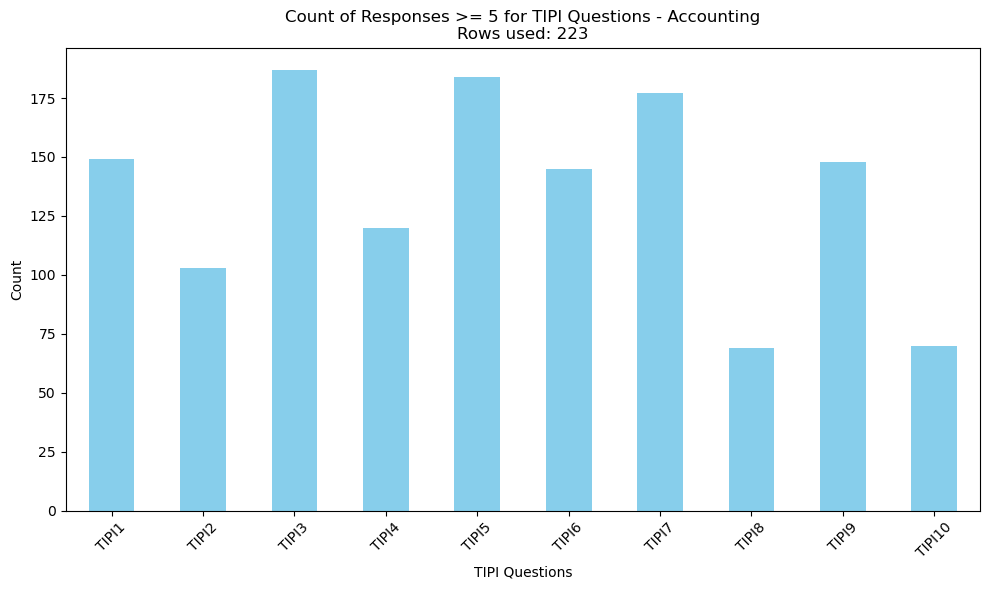

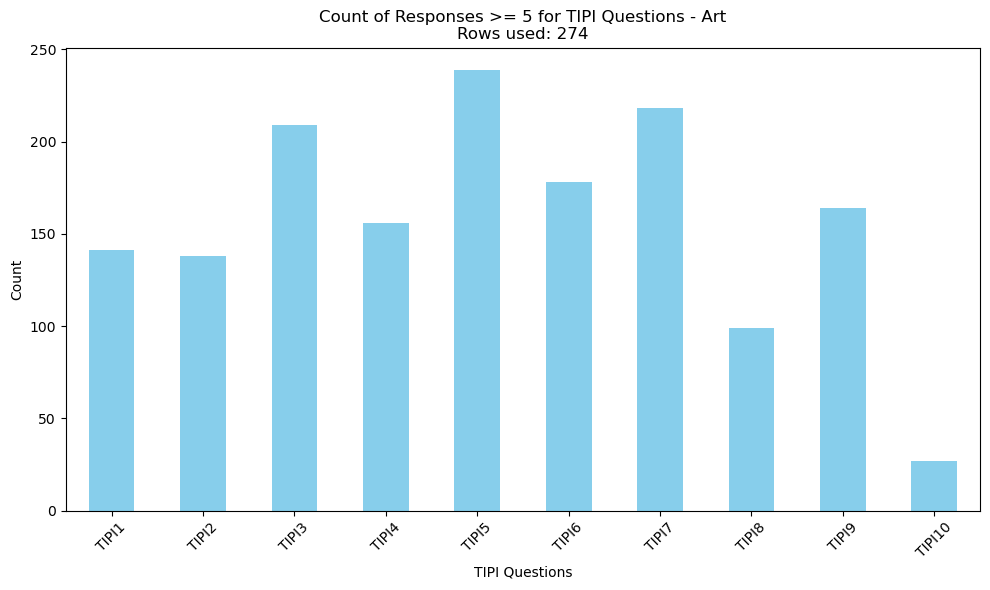

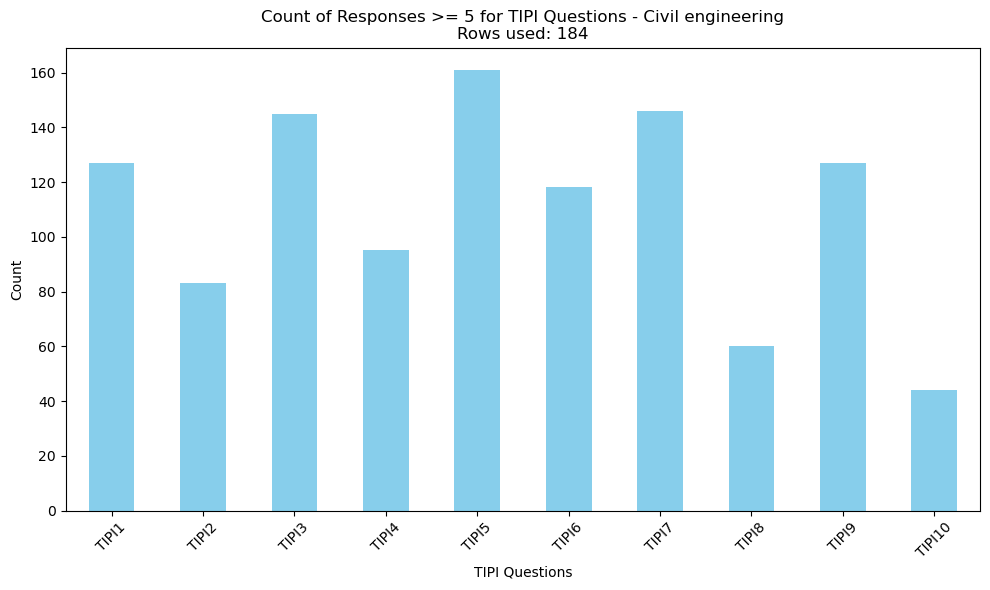

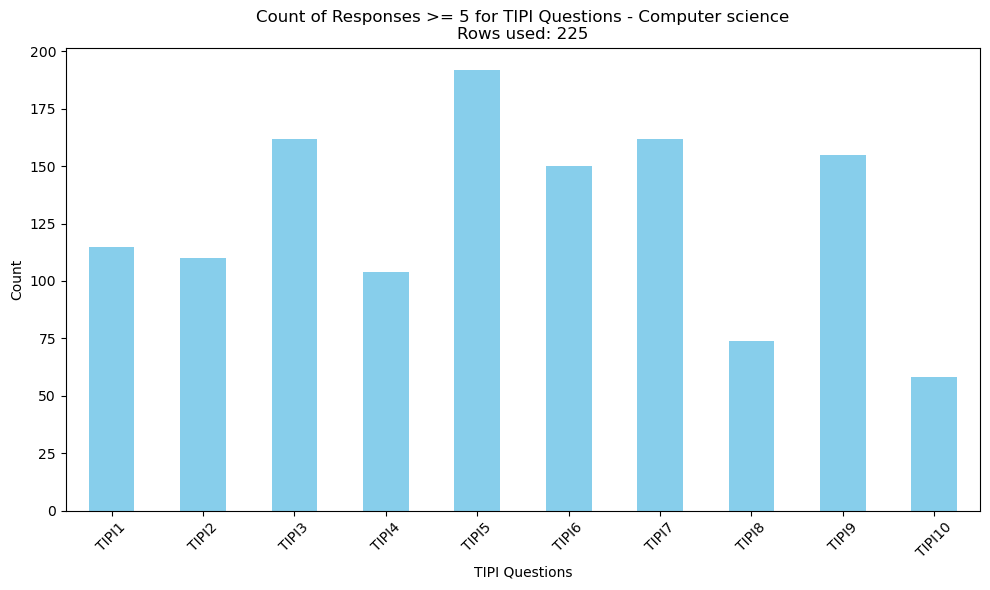

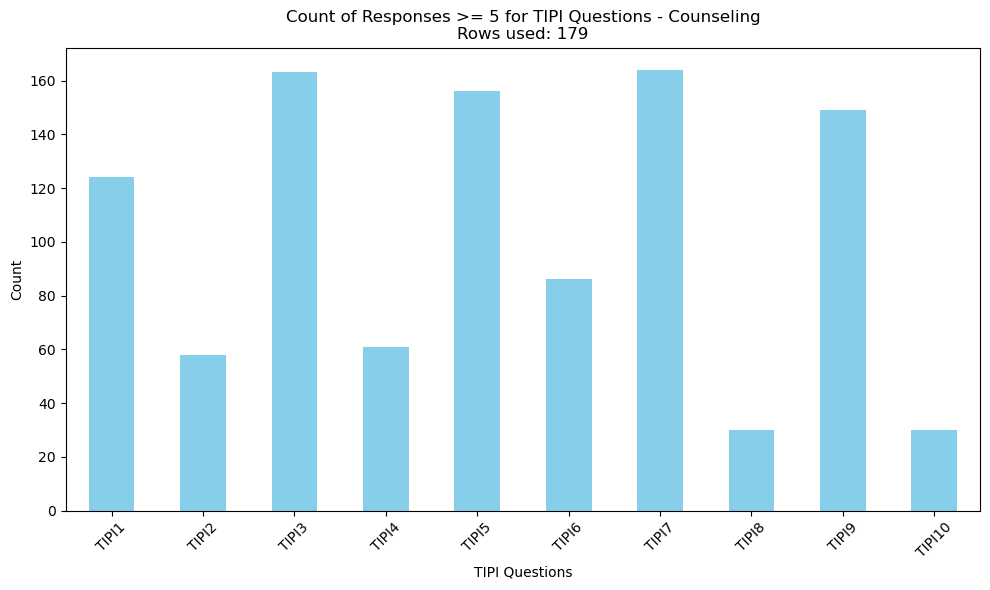

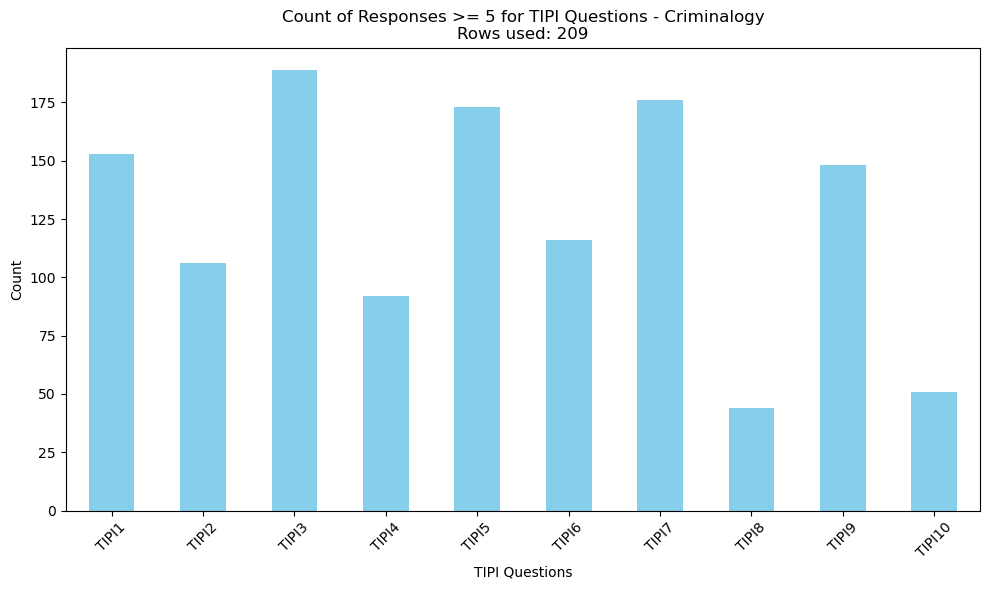

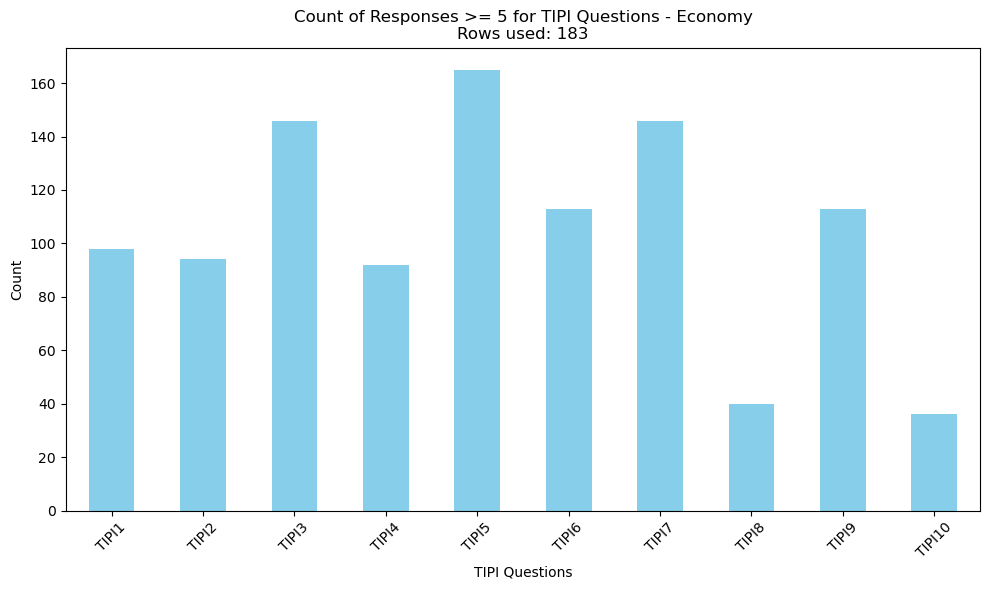

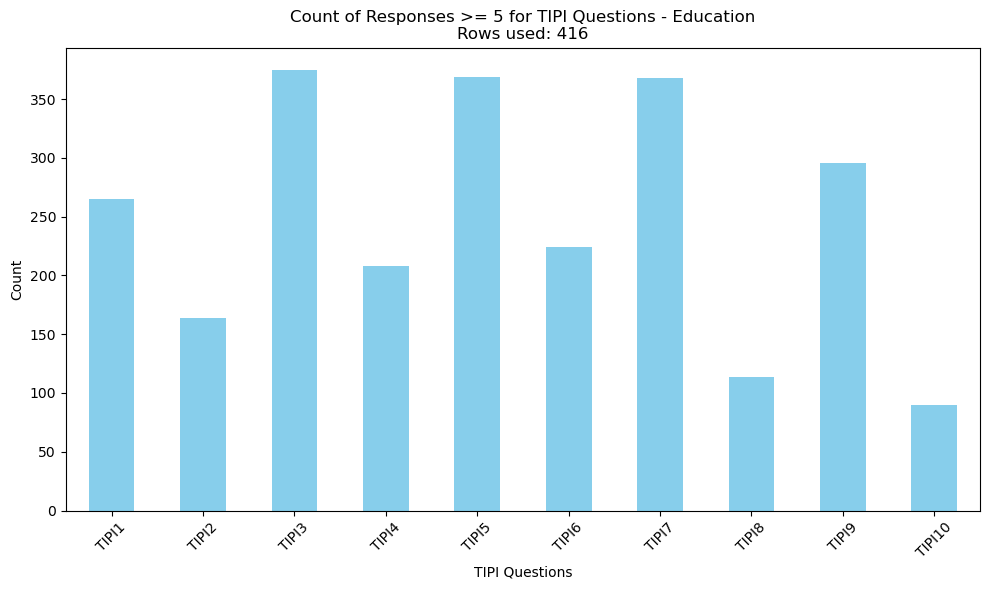

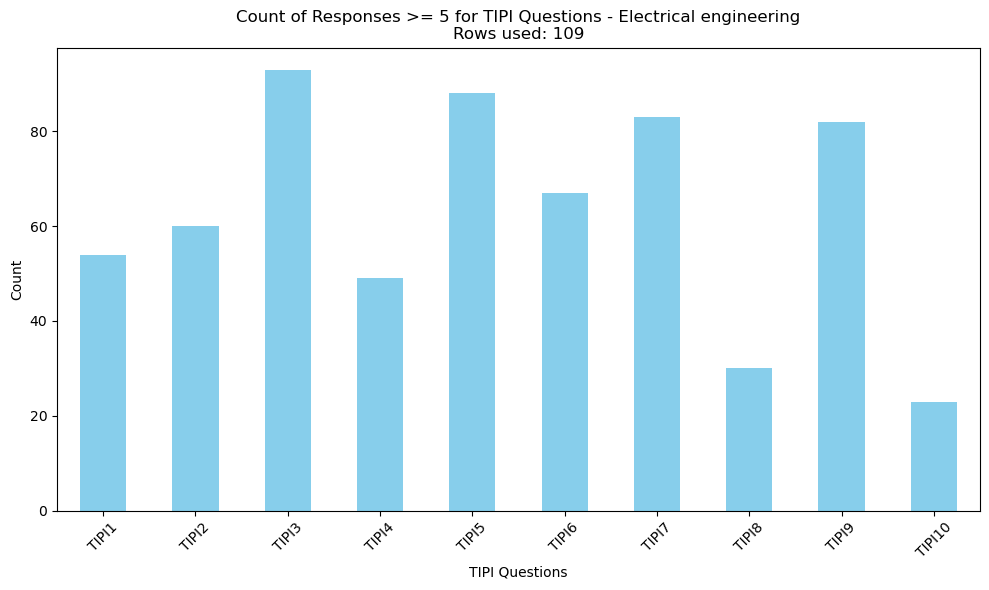

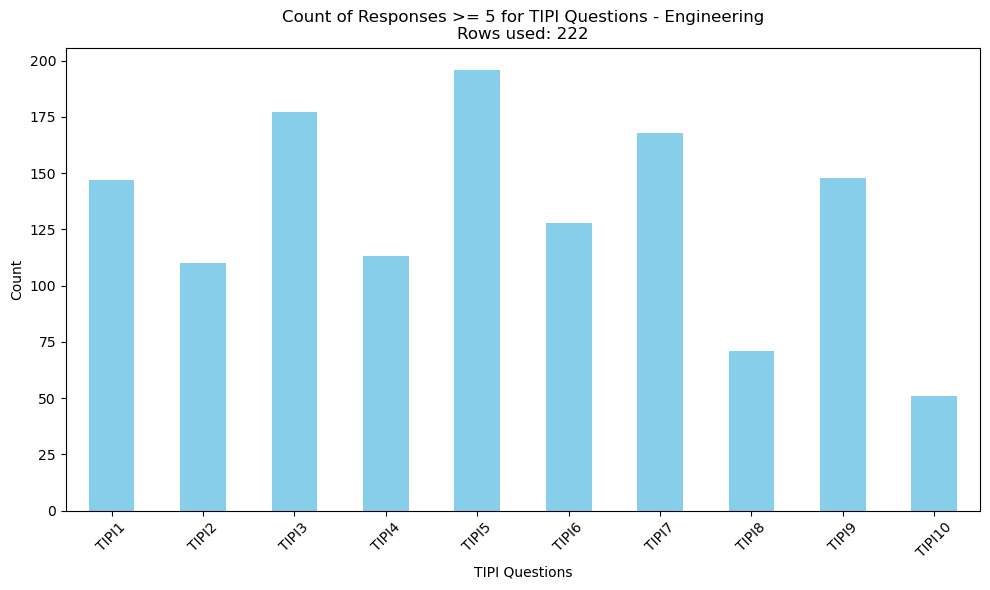

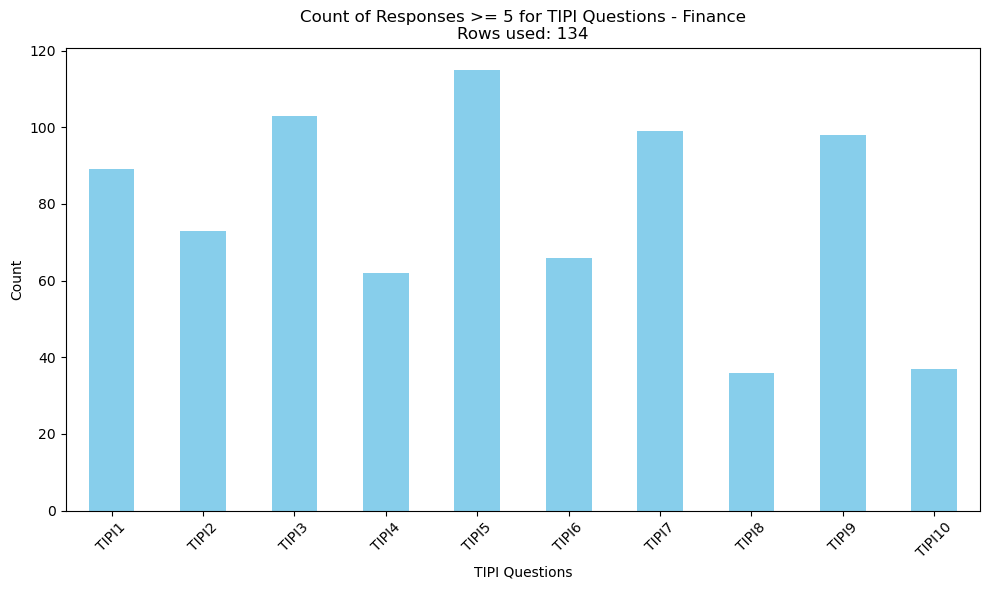

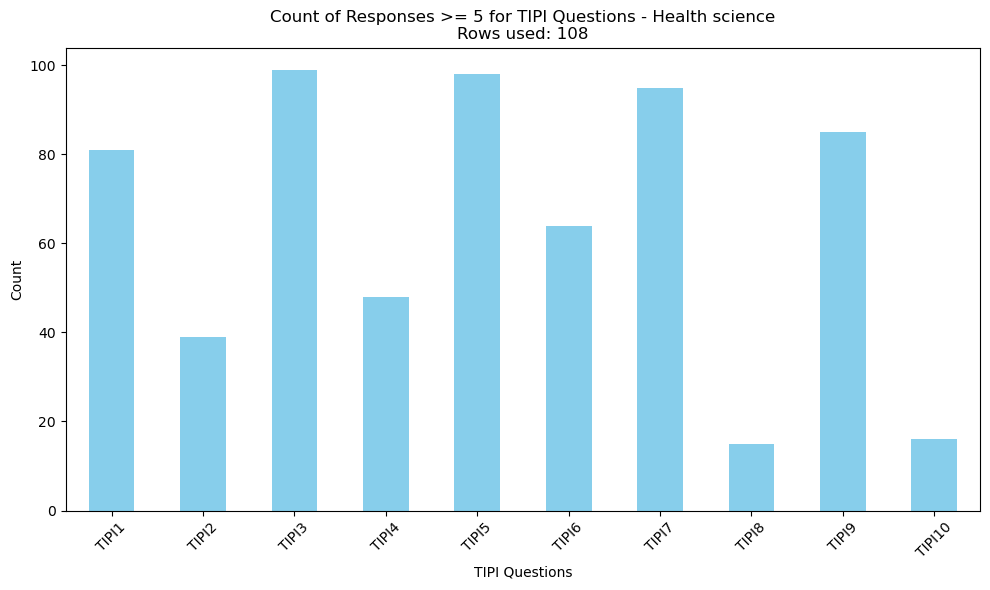

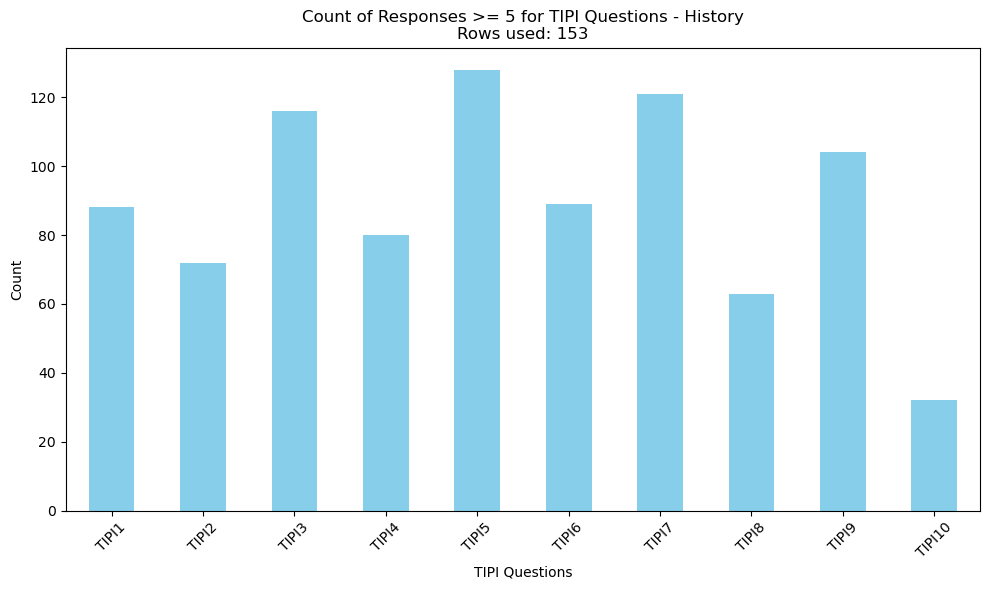

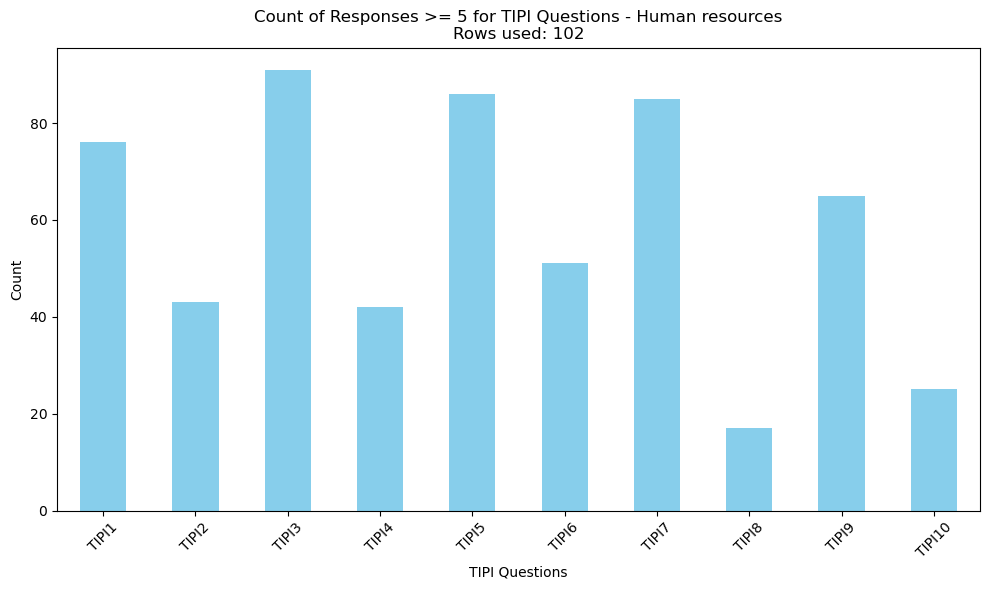

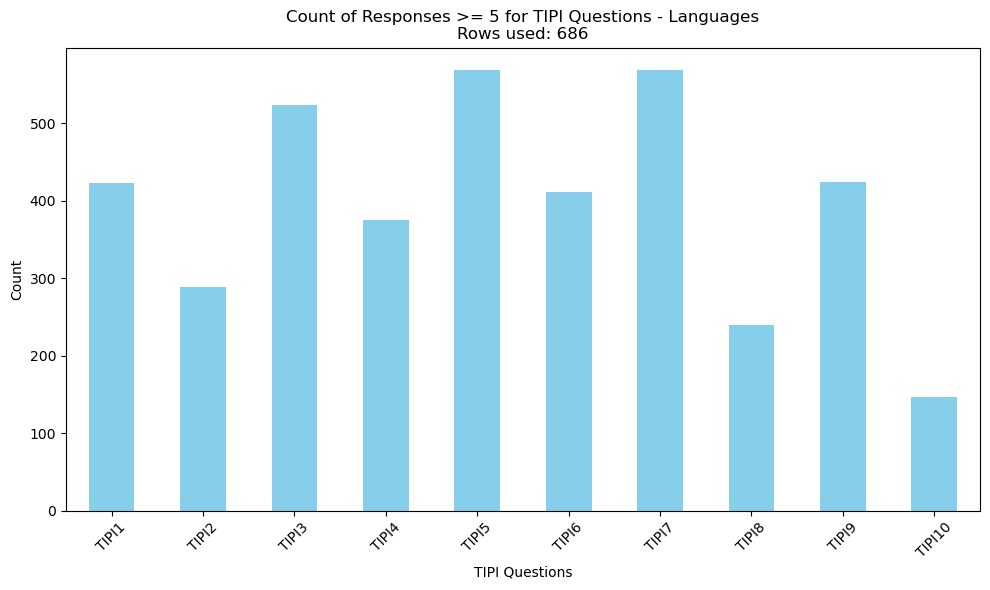

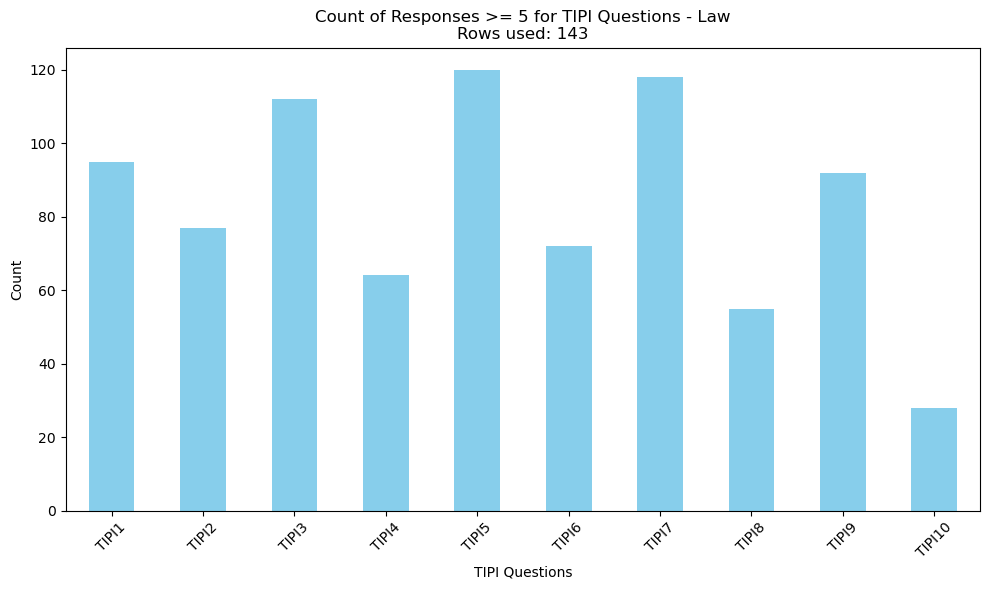

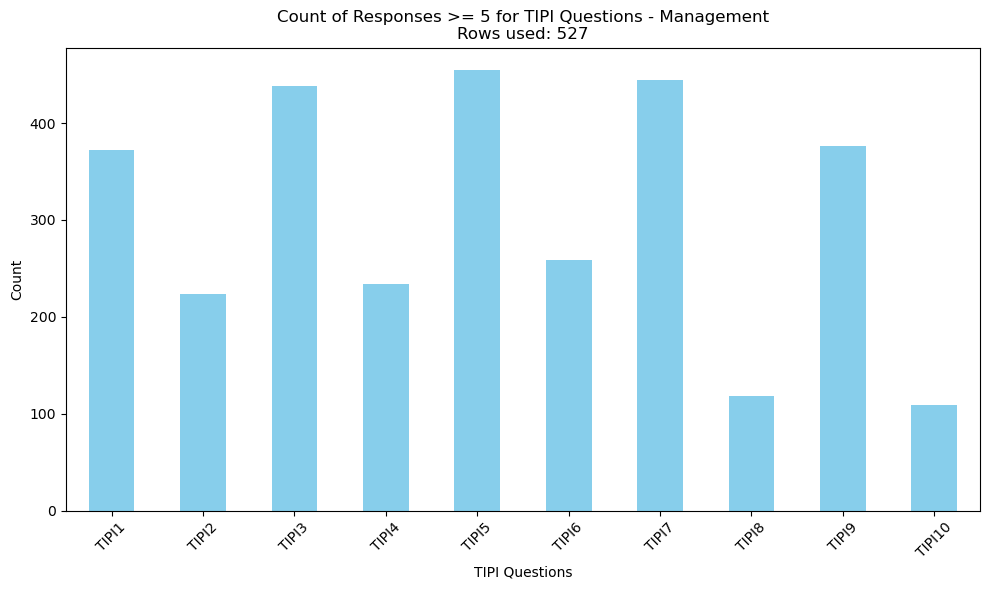

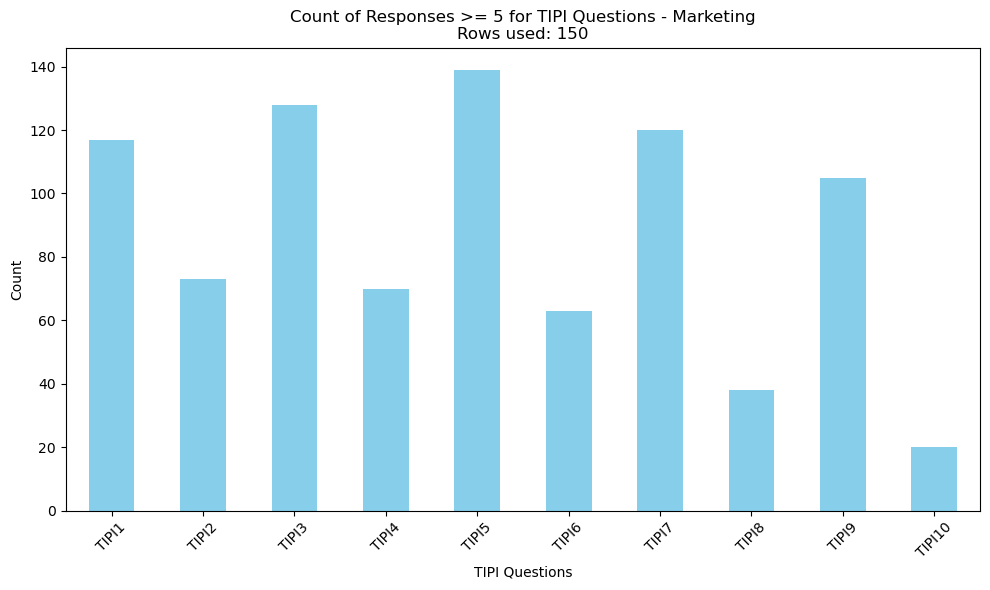

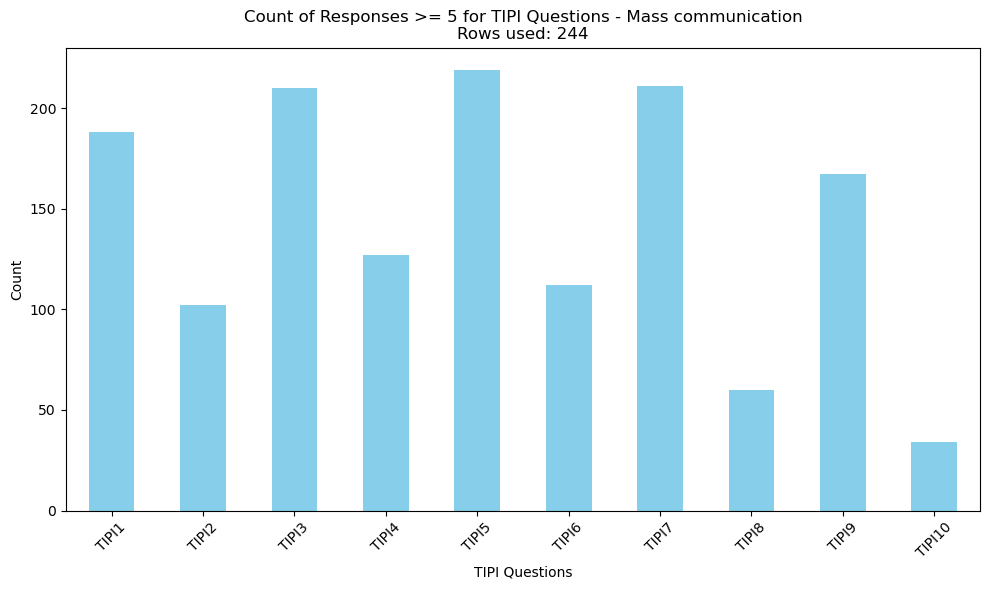

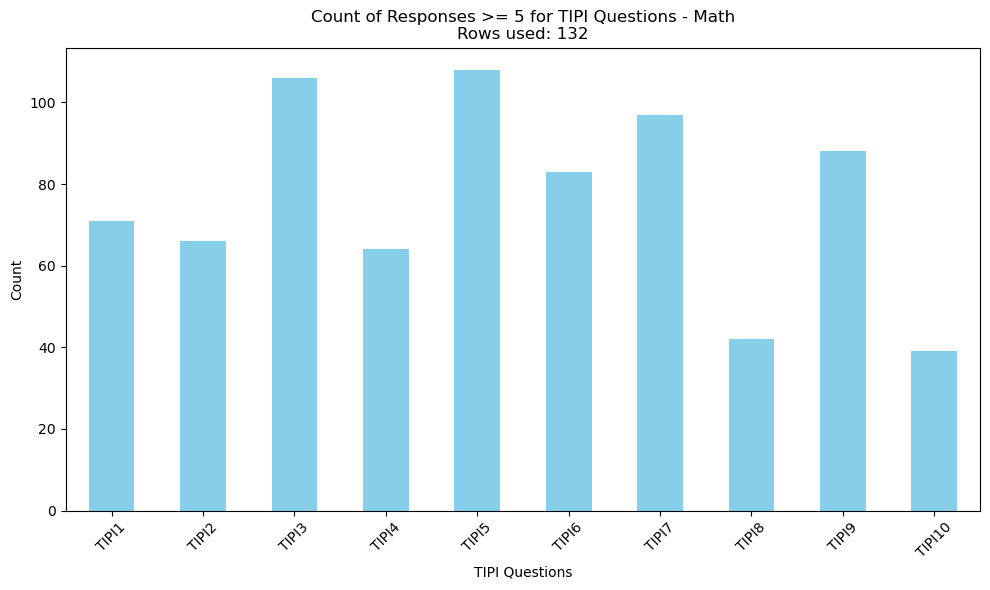

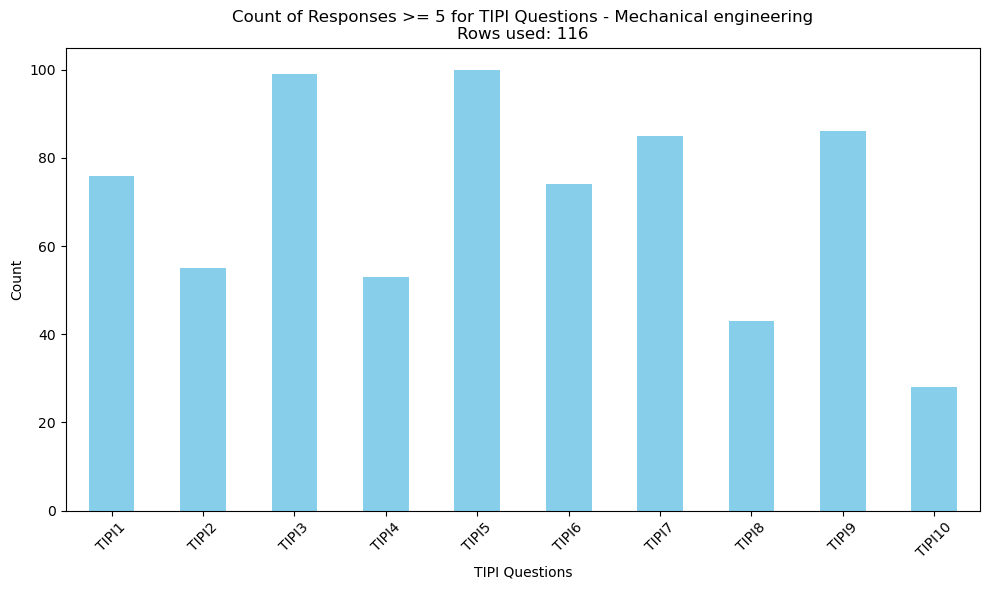

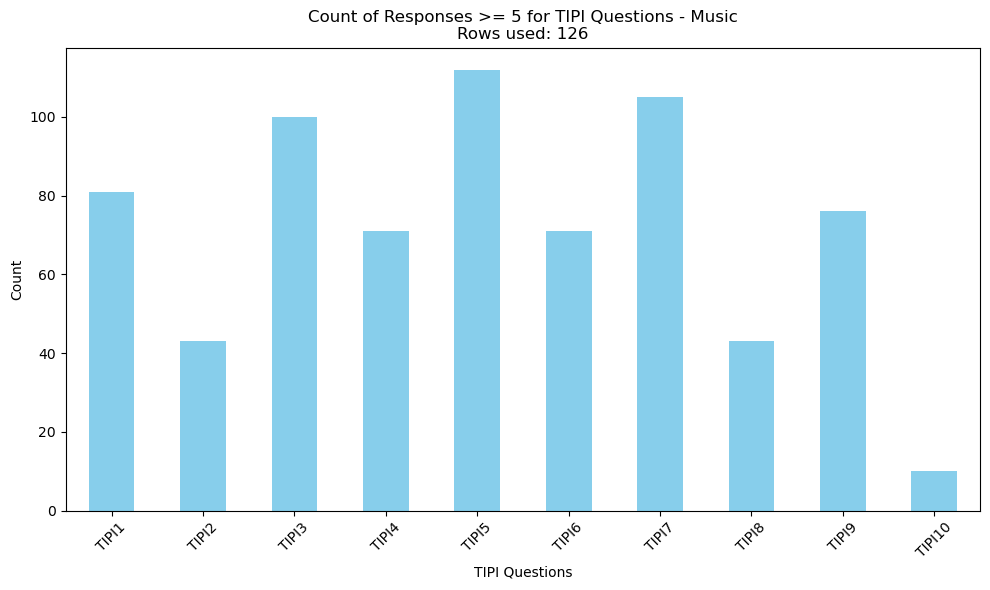

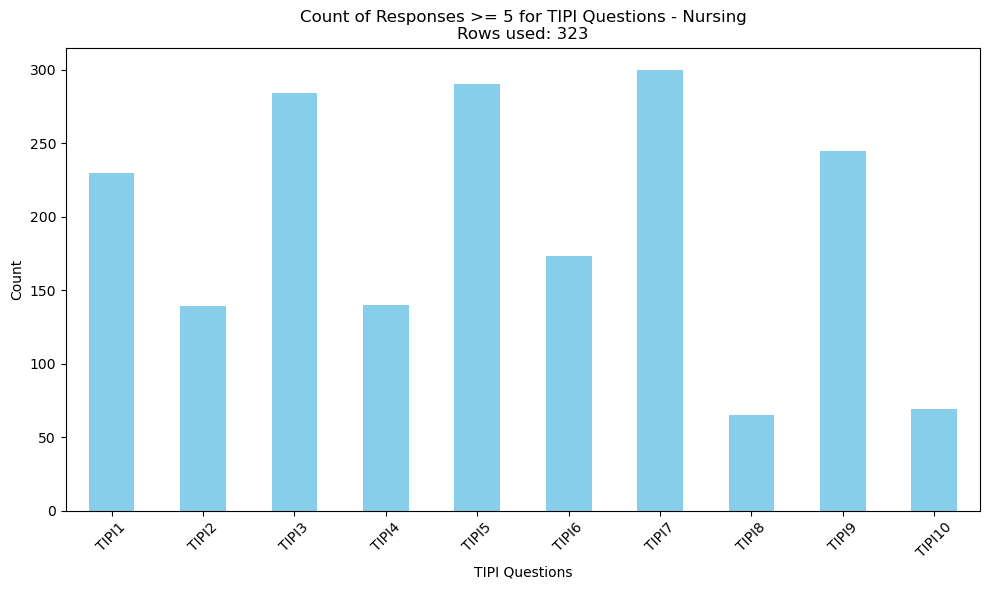

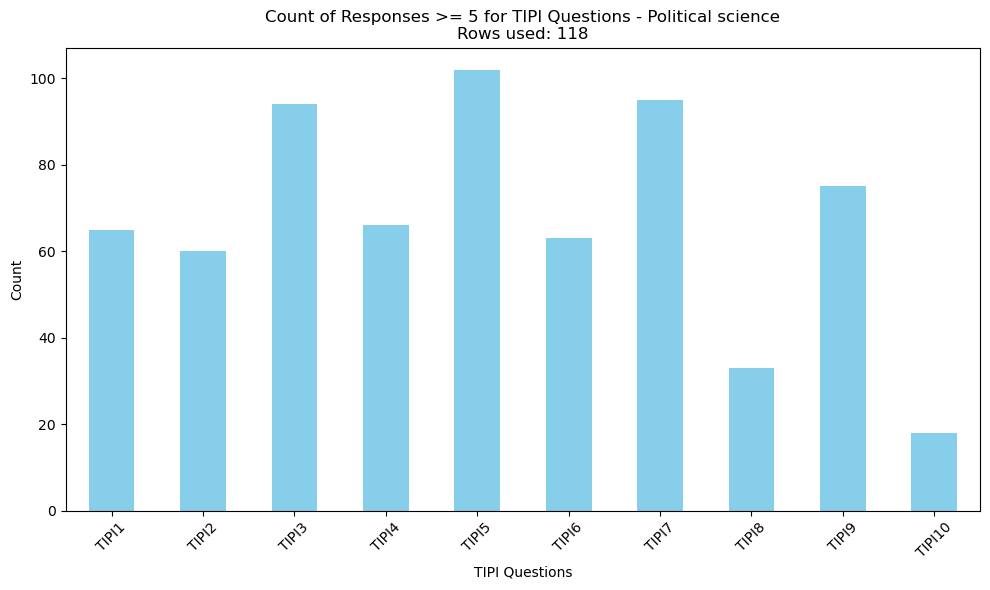

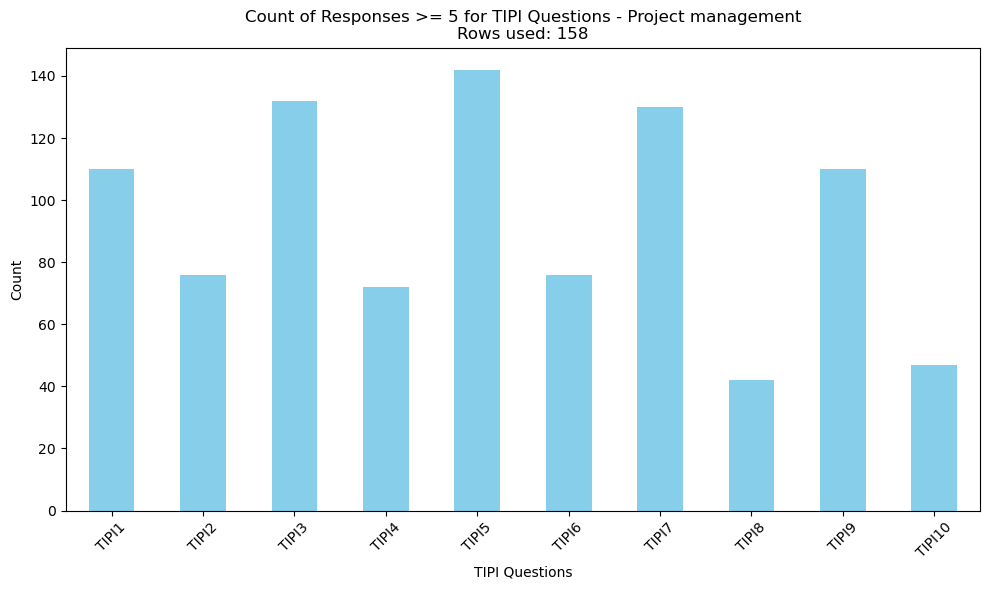

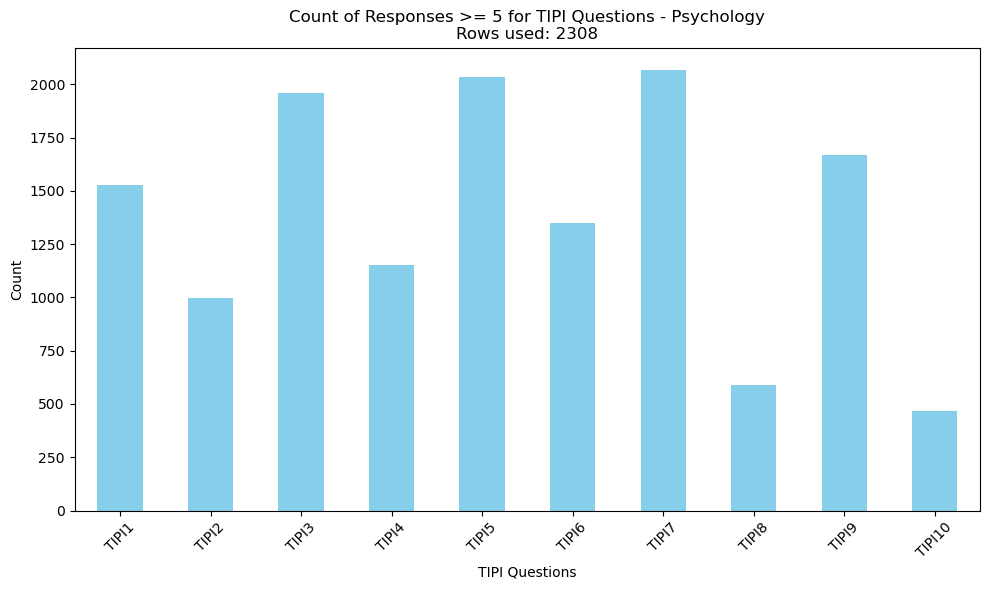

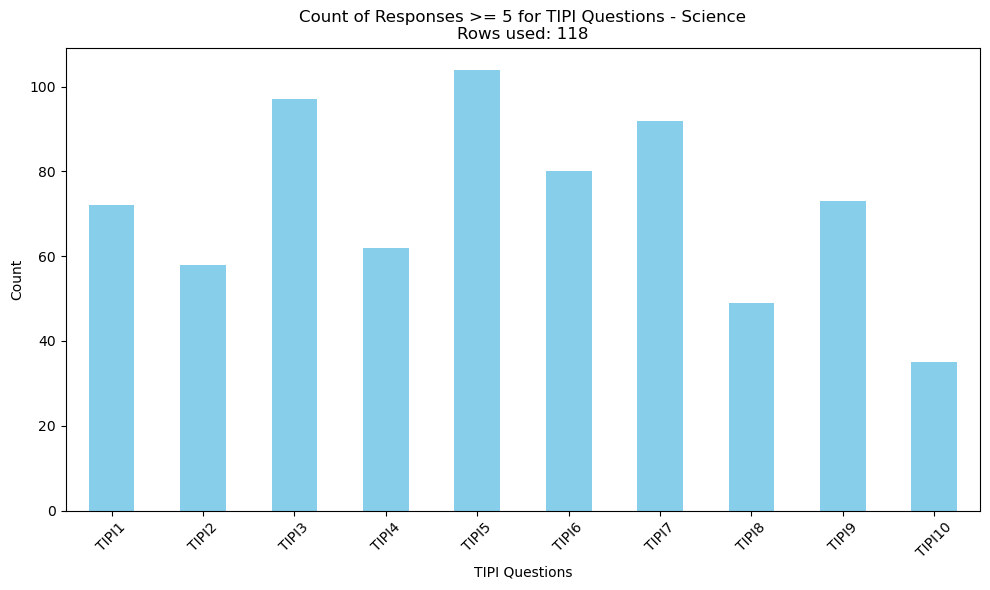

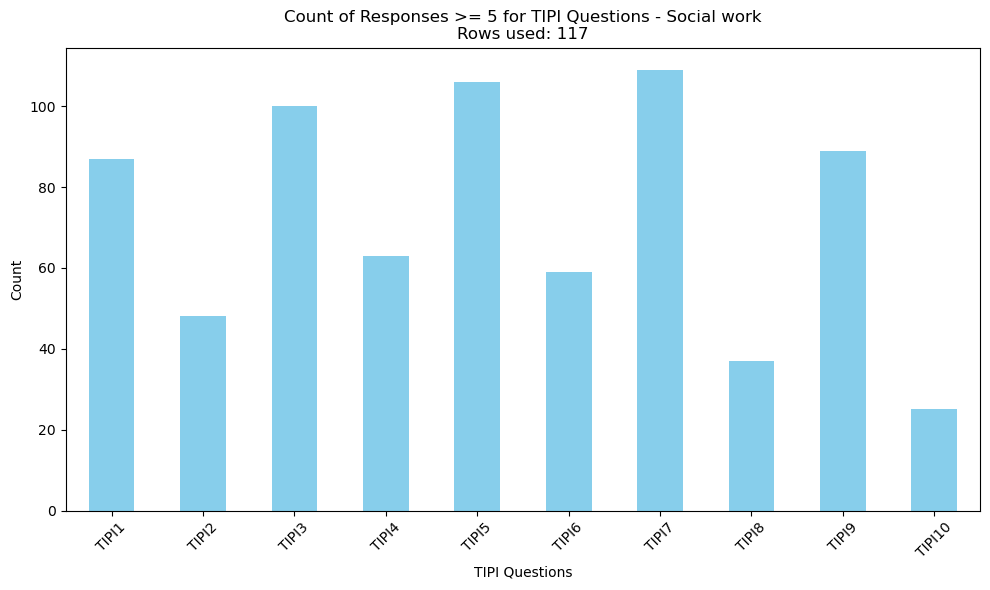

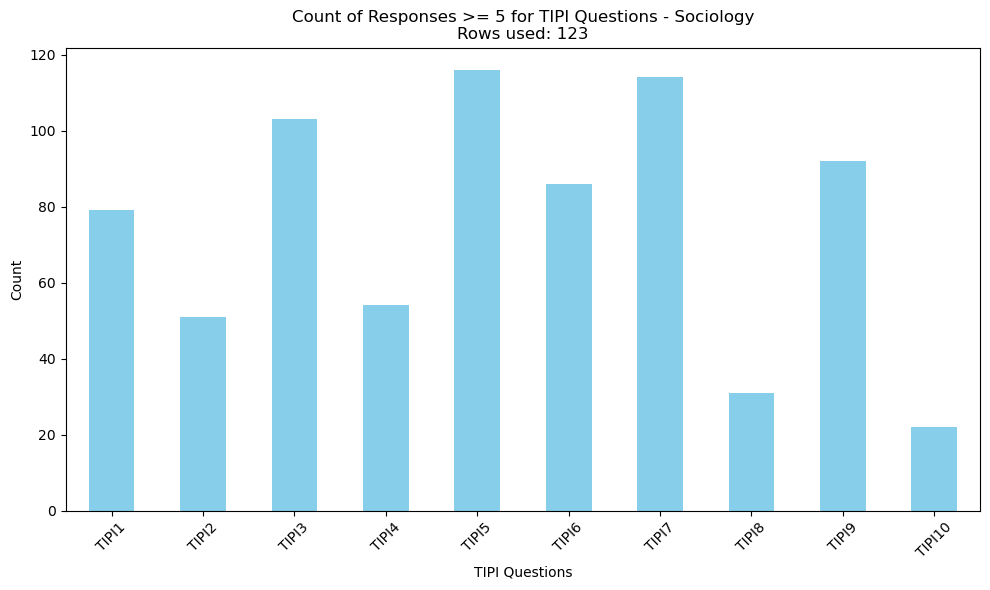

In [5]:
# دالة إنشاء رسم توضيحي لكل تخصص على حدة
def plot_individual_majors_with_counts(df):
    # حساب عدد الإجابات التي تساوي أو تزيد عن 5 لكل سؤال حسب التخصص
    grouped_data = (df.drop(columns='major') >= 5).groupby(df['major']).sum()
    
    # إنشاء رسم لكل تخصص
    for major in grouped_data.index:
        # عدد الصفوف المستخدمة لكل تخصص
        row_count = df[df['major'] == major].shape[0]
        
        # إنشاء الرسم البياني
        plt.figure(figsize=(10, 6))
        grouped_data.loc[major].plot(kind='bar', color='skyblue')
        plt.title(f"Count of Responses >= 5 for TIPI Questions - {major.capitalize()}\n"
                  f"Rows used: {row_count}")
        plt.xlabel("TIPI Questions")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# تنفيذ الدالة
plot_individual_majors_with_counts(df)

In [6]:
###############################################################################################################

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [8]:
# ---. تهيئة البيانات ---
X = df[['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']]
y = df['major']

In [9]:
# تحويل النصوص في عمود 'major' إلى أرقام باستخدام LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [30]:
# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [31]:
# ---  إنشاء وتدريب نموذج Decision Tree ---
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # يمكن تعديل max_depth حسب الحاجة
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [32]:
# --- تقييم الأداء ---
# التنبؤ على مجموعة الاختبار
y_pred = dt_model.predict(X_test)

In [33]:
# عرض النتائج
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.26140567200986436

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        41
           3       0.08      0.02      0.03        49
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        80
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        15
          14       0.07      0.02      0.04       127
          15       0.00      0.00      0.00        24
          16       0.00   

C:\Users\Nagham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nagham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nagham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


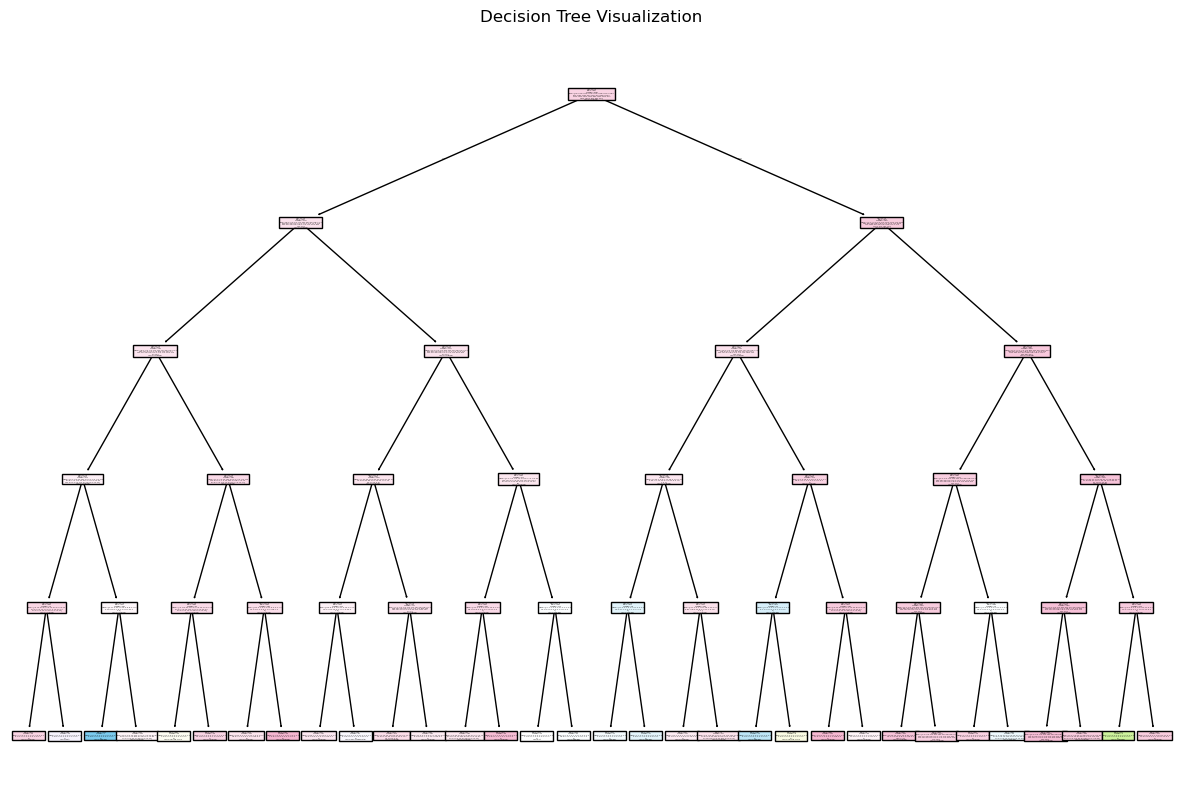

In [34]:
# --- 5. رسم الشجرة ---
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [35]:
#####################################################################################################

In [36]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [37]:
X = df[['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']]
y = df['major']

In [38]:
# تحويل النصوص في عمود 'major' إلى أرقام باستخدام LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:
# ---  إعداد K-Fold Cross-Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # استخدام 5 طيات

In [40]:
# --- اختيار نموذج Naive Bayes ---
nb_model = GaussianNB()  # Naive Bayes المناسب للبيانات المستمرة

In [41]:
# --- تقييم الأداء باستخدام K-Fold ---
# حساب الدقة عبر جميع الطيات
scores = cross_val_score(nb_model, X, y_encoded, cv=kf, scoring='accuracy')

In [42]:
print("Accuracy scores for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))

Accuracy scores for each fold: [0.2595561  0.26942047 0.2755857  0.27003699 0.28175092]
Mean Accuracy: 0.2712700369913687


In [43]:
##########################################################################################

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['major'])
y = df['major']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

sample_input = X_test[0].reshape(1, -1)
predicted_major = model.predict(sample_input)
print(f"Predicted Major: {predicted_major[0]}")

Accuracy: 0.24
Classification Report:
                        precision    recall  f1-score   support

            accounting       0.12      0.04      0.06        49
                   art       0.00      0.00      0.00        51
     civil engineering       0.00      0.00      0.00        41
      computer science       0.00      0.00      0.00        49
            counseling       0.00      0.00      0.00        35
           criminalogy       0.10      0.02      0.04        46
               economy       0.00      0.00      0.00        42
             education       0.05      0.03      0.03        80
electrical engineering       0.25      0.04      0.06        28
           engineering       0.09      0.02      0.04        44
               finance       0.00      0.00      0.00        24
        health science       0.00      0.00      0.00        18
               history       0.00      0.00      0.00        31
       human resources       0.00      0.00      0.00        15
 

In [45]:
##########################################################################################

In [46]:
# ---  حساب توزيع الفئات ---
class_counts = df['major'].value_counts()

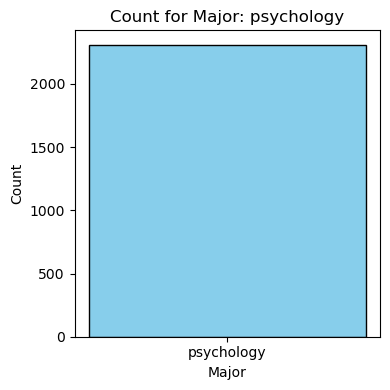

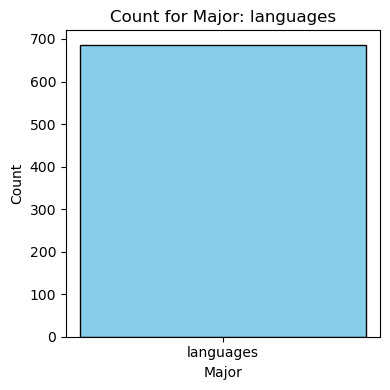

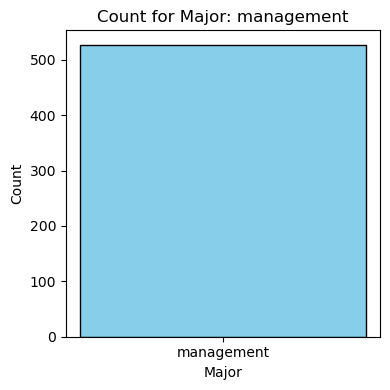

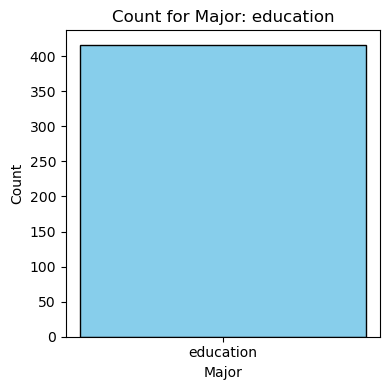

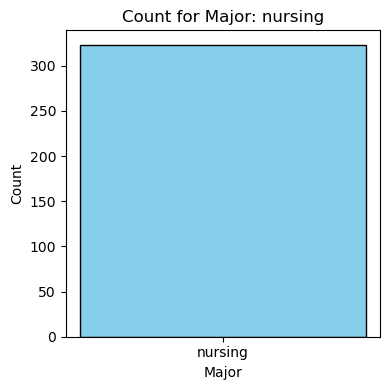

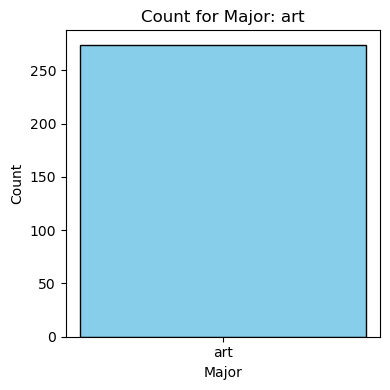

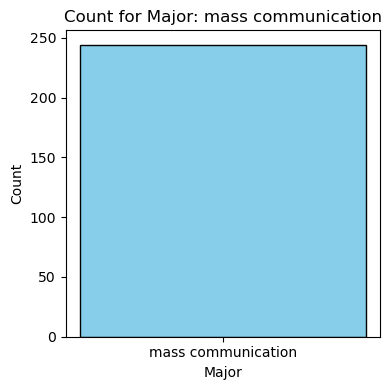

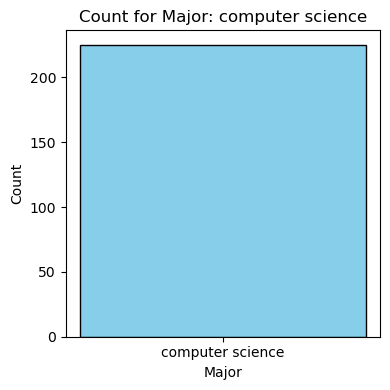

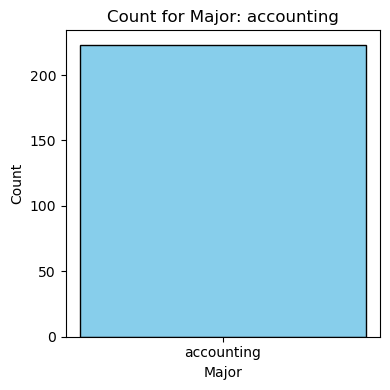

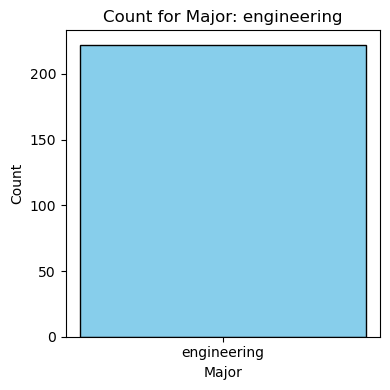

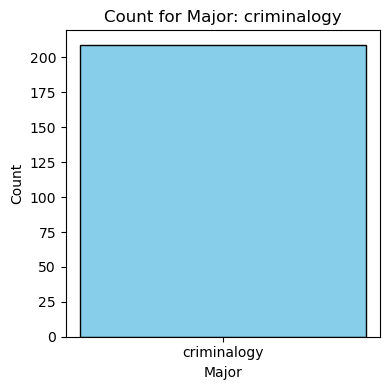

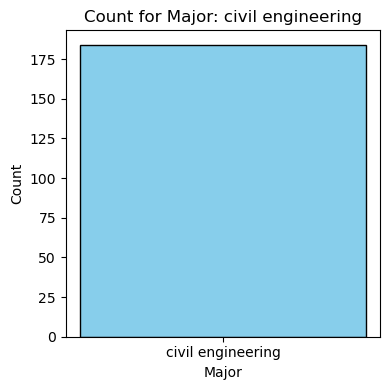

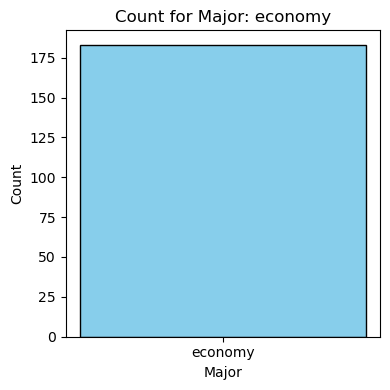

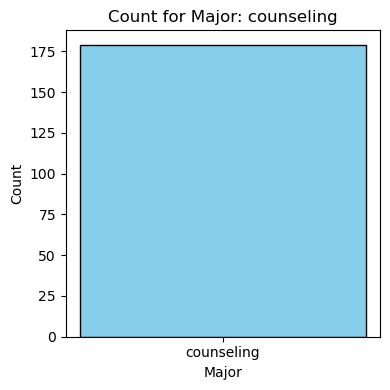

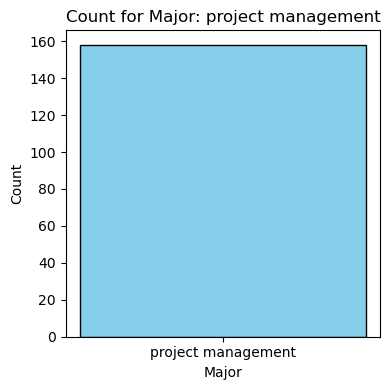

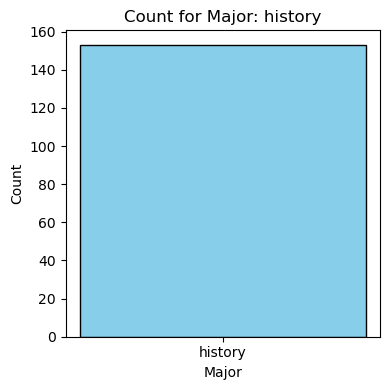

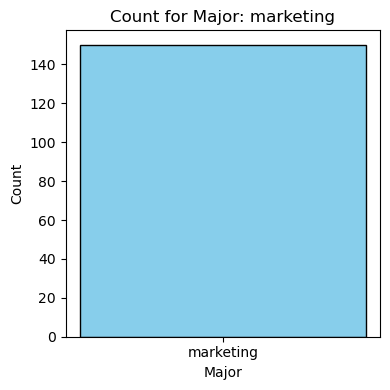

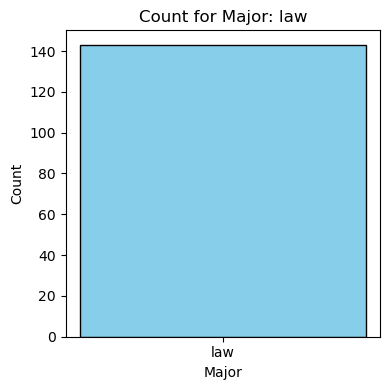

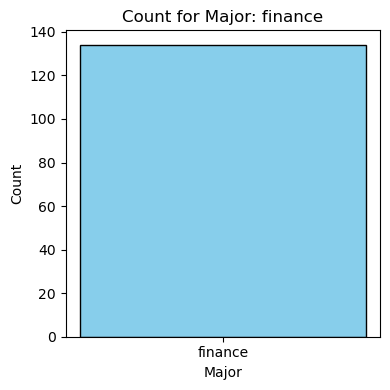

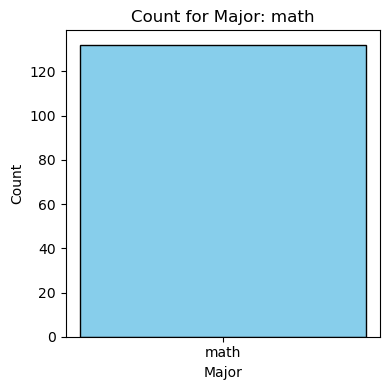

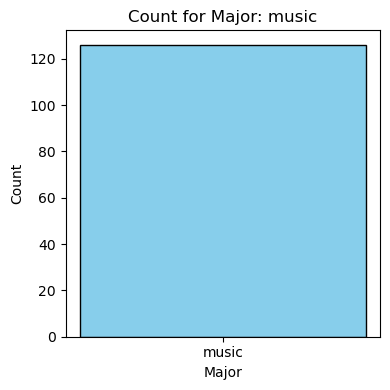

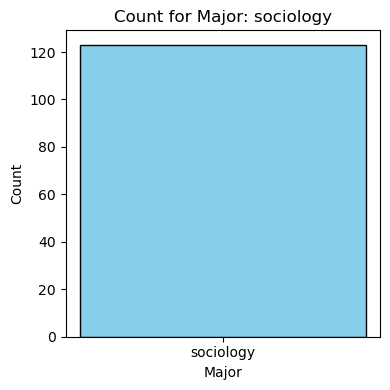

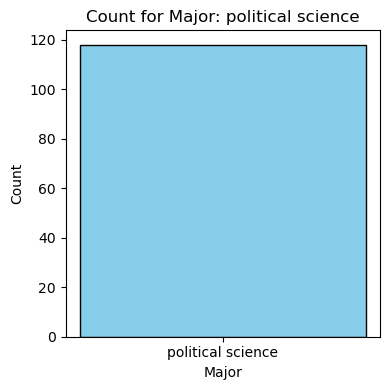

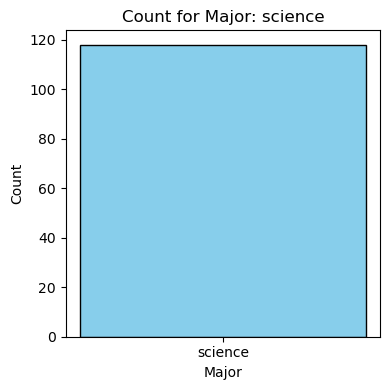

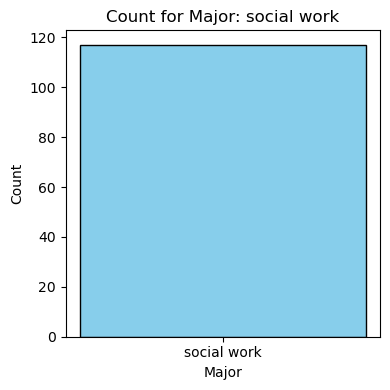

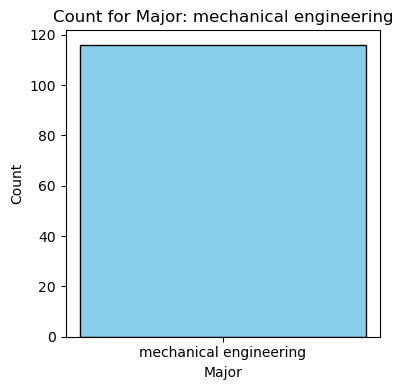

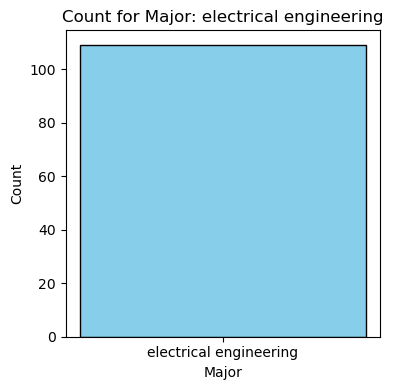

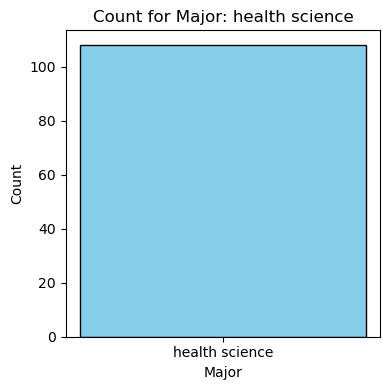

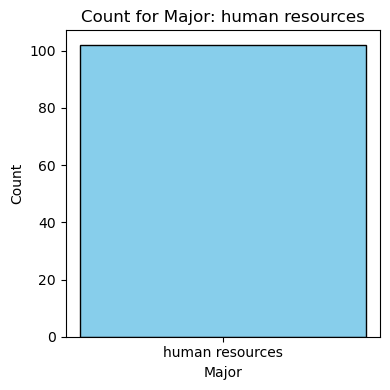

In [47]:
# ---  رسم كل فئة بشكل منفصل ---
for major, count in class_counts.items():
    plt.figure(figsize=(4, 4))
    plt.bar(major, count, color='skyblue', edgecolor='black')
    plt.title(f"Count for Major: {major}")
    plt.xlabel("Major")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()